In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
nutridict = {
    "FFQ1": "Milk_Yoghurt",
    "FFQ2": "Milk_Yoghurt_LowFat",
    "FFQ3": "Yellow_Cheese",
    "FFQ4": "Feta_Cheese",
    "FFQ5": "Cheese_LowFat",
    "FFQ6": "Eggs",
    "FFQ7": "White_Bread",
    "FFQ8": "Wholemeal_Bread",
    "FFQ11": "Cereals",
    "FFQ12": "White_Rice",
    "FFQ13": "Brown_Rice",
    "FFQ14": "Pasta",
    "FFQ15": "Pasta_Wholemeal",
    "FFQ16": "Potatoes_Boiled",
    "FFQ17": "Potatoes_Fried",
    "FFQ18": "Veal",
    "FFQ19": "Meat_Balls",
    "FFQ20": "Chicken",
    "FFQ21": "Pork",
    "FFQ22": "Lamb_Goat_Game",
    "FFQ23": "Meat_Cold_Sliced",
    "FFQ24": "Sausages",
    "FFQ25": "Meat_Cold_Sliced_LowFat",
    "FFQ26": "Fish_Small",
    "FFQ27": "Fish_Large",
    "FFQ28": "Seafood_Misc",
    "FFQ29": "Legumes",
    "FFQ30": "Spinach",
    "FFQ31": "Pastitsio_Moussaka_Papoutsakia",
    "FFQ32": "Petit_Pois",
    "FFQ33": "Tomato_Cucumber_Carrot_Pepper",
    "FFQ34": "Lettuce_Cabbage_Spinach_Rocket",
    "FFQ35": "Broccoli_Cauliflower_Courgette",
    "FFQ37": "Orange",
    "FFQ38": "Apples_Pears",
    "FFQ39": "Winter_Fruits_Misc",
    "FFQ40": "Banana",
    "FFQ41": "Summer_Fruits_Misc",
    "FFQ43": "Fruits_Dried",
    "FFQ44": "Nuts",
    "FFQ45": "Pies",
    "FFQ46": "Pies",
    "FFQ48": "Cakes",
    "FFQ49": "Sweets_Preserved",
    "FFQ50": "Cakes",
    "FFQ51": "Cakes",
    "FFQ52": "Chocolate",
    "FFQ53": "Ice_Cream",
    "FFQ54": "Salty_Snacks",
    "FFQ55": "Honey_Marmalade",
    "FFQ56": "Olives",
    "FFQ57": "Wine",
    "FFQ58": "Beer",
    "FFQ59": "Alcohold_Misc",
    "FFQ60": "Soda",
    "FFQ61": "Soda",
    "FFQ62": "Coffee",
    "FFQ63": "Tea",
    "FFQ64": "Mayonnaise",
    "FFQ65": "Mayonnaise",
    "FFQ66": "Olive_Oil_Freq",
    "FFQ67": "Seed_Oil_Freq",
    "FFQ68": "Margarine_Freq",
    "FFQ69": "Butter_Freq"
}

In [4]:
heliad_nutri = pd.read_csv("./heliad_nutri_subset.csv", header=0)

In [5]:
heliad_foods = heliad_nutri.drop(['Unnamed: 0', 'AgeC', 'SexD', 'BMI', 'Constipation',
       'REM_Sleep_Behavior_Disorder', 'Motor_Symptoms_Parkinsonism',
       'Fluctuation_Consciousness', 'Fluctuation_Cognition',
       'Orthostatic_Hypotension', 'Episodes_Blank_Switch_Off', 'ZME', 'ZEX', 'ZVS', 'ZLA', 'ZAS', 'ZCO'], axis=1)

In [6]:
for food in nutridict.values():
    data = heliad_foods[food]
    mean_val = data.mean()
    std_val = data.std()
    food_zc = f"{food}_ZC"
    if std_val > 0: 
        heliad_foods[food_zc] = (data - mean_val) / std_val
    else:
        heliad_foods[food_zc] = 0

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_51329/2022694442.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  heliad_foods[food_zc] = (data - mean_val) / std_val


In [7]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [8]:
import re
p = re.compile("^.+ZC$")
food_columns = [col for col in heliad_foods.columns if p.match(col)]

In [9]:
food_data = heliad_foods[food_columns].copy()

In [10]:
corr_matrix_pearson = food_data.corr(method='pearson')

print("Pearson Correlation Matrix Summary:")
print(f"Shape: {corr_matrix_pearson.shape}")
print(f"Range: [{corr_matrix_pearson.min().min():.3f}, {corr_matrix_pearson.max().max():.3f}]")
print(f"Mean absolute correlation: {corr_matrix_pearson.abs().mean().mean():.3f}")

Pearson Correlation Matrix Summary:
Shape: (59, 59)
Range: [-0.762, 1.000]
Mean absolute correlation: 0.079


<Figure size 2000x1800 with 0 Axes>

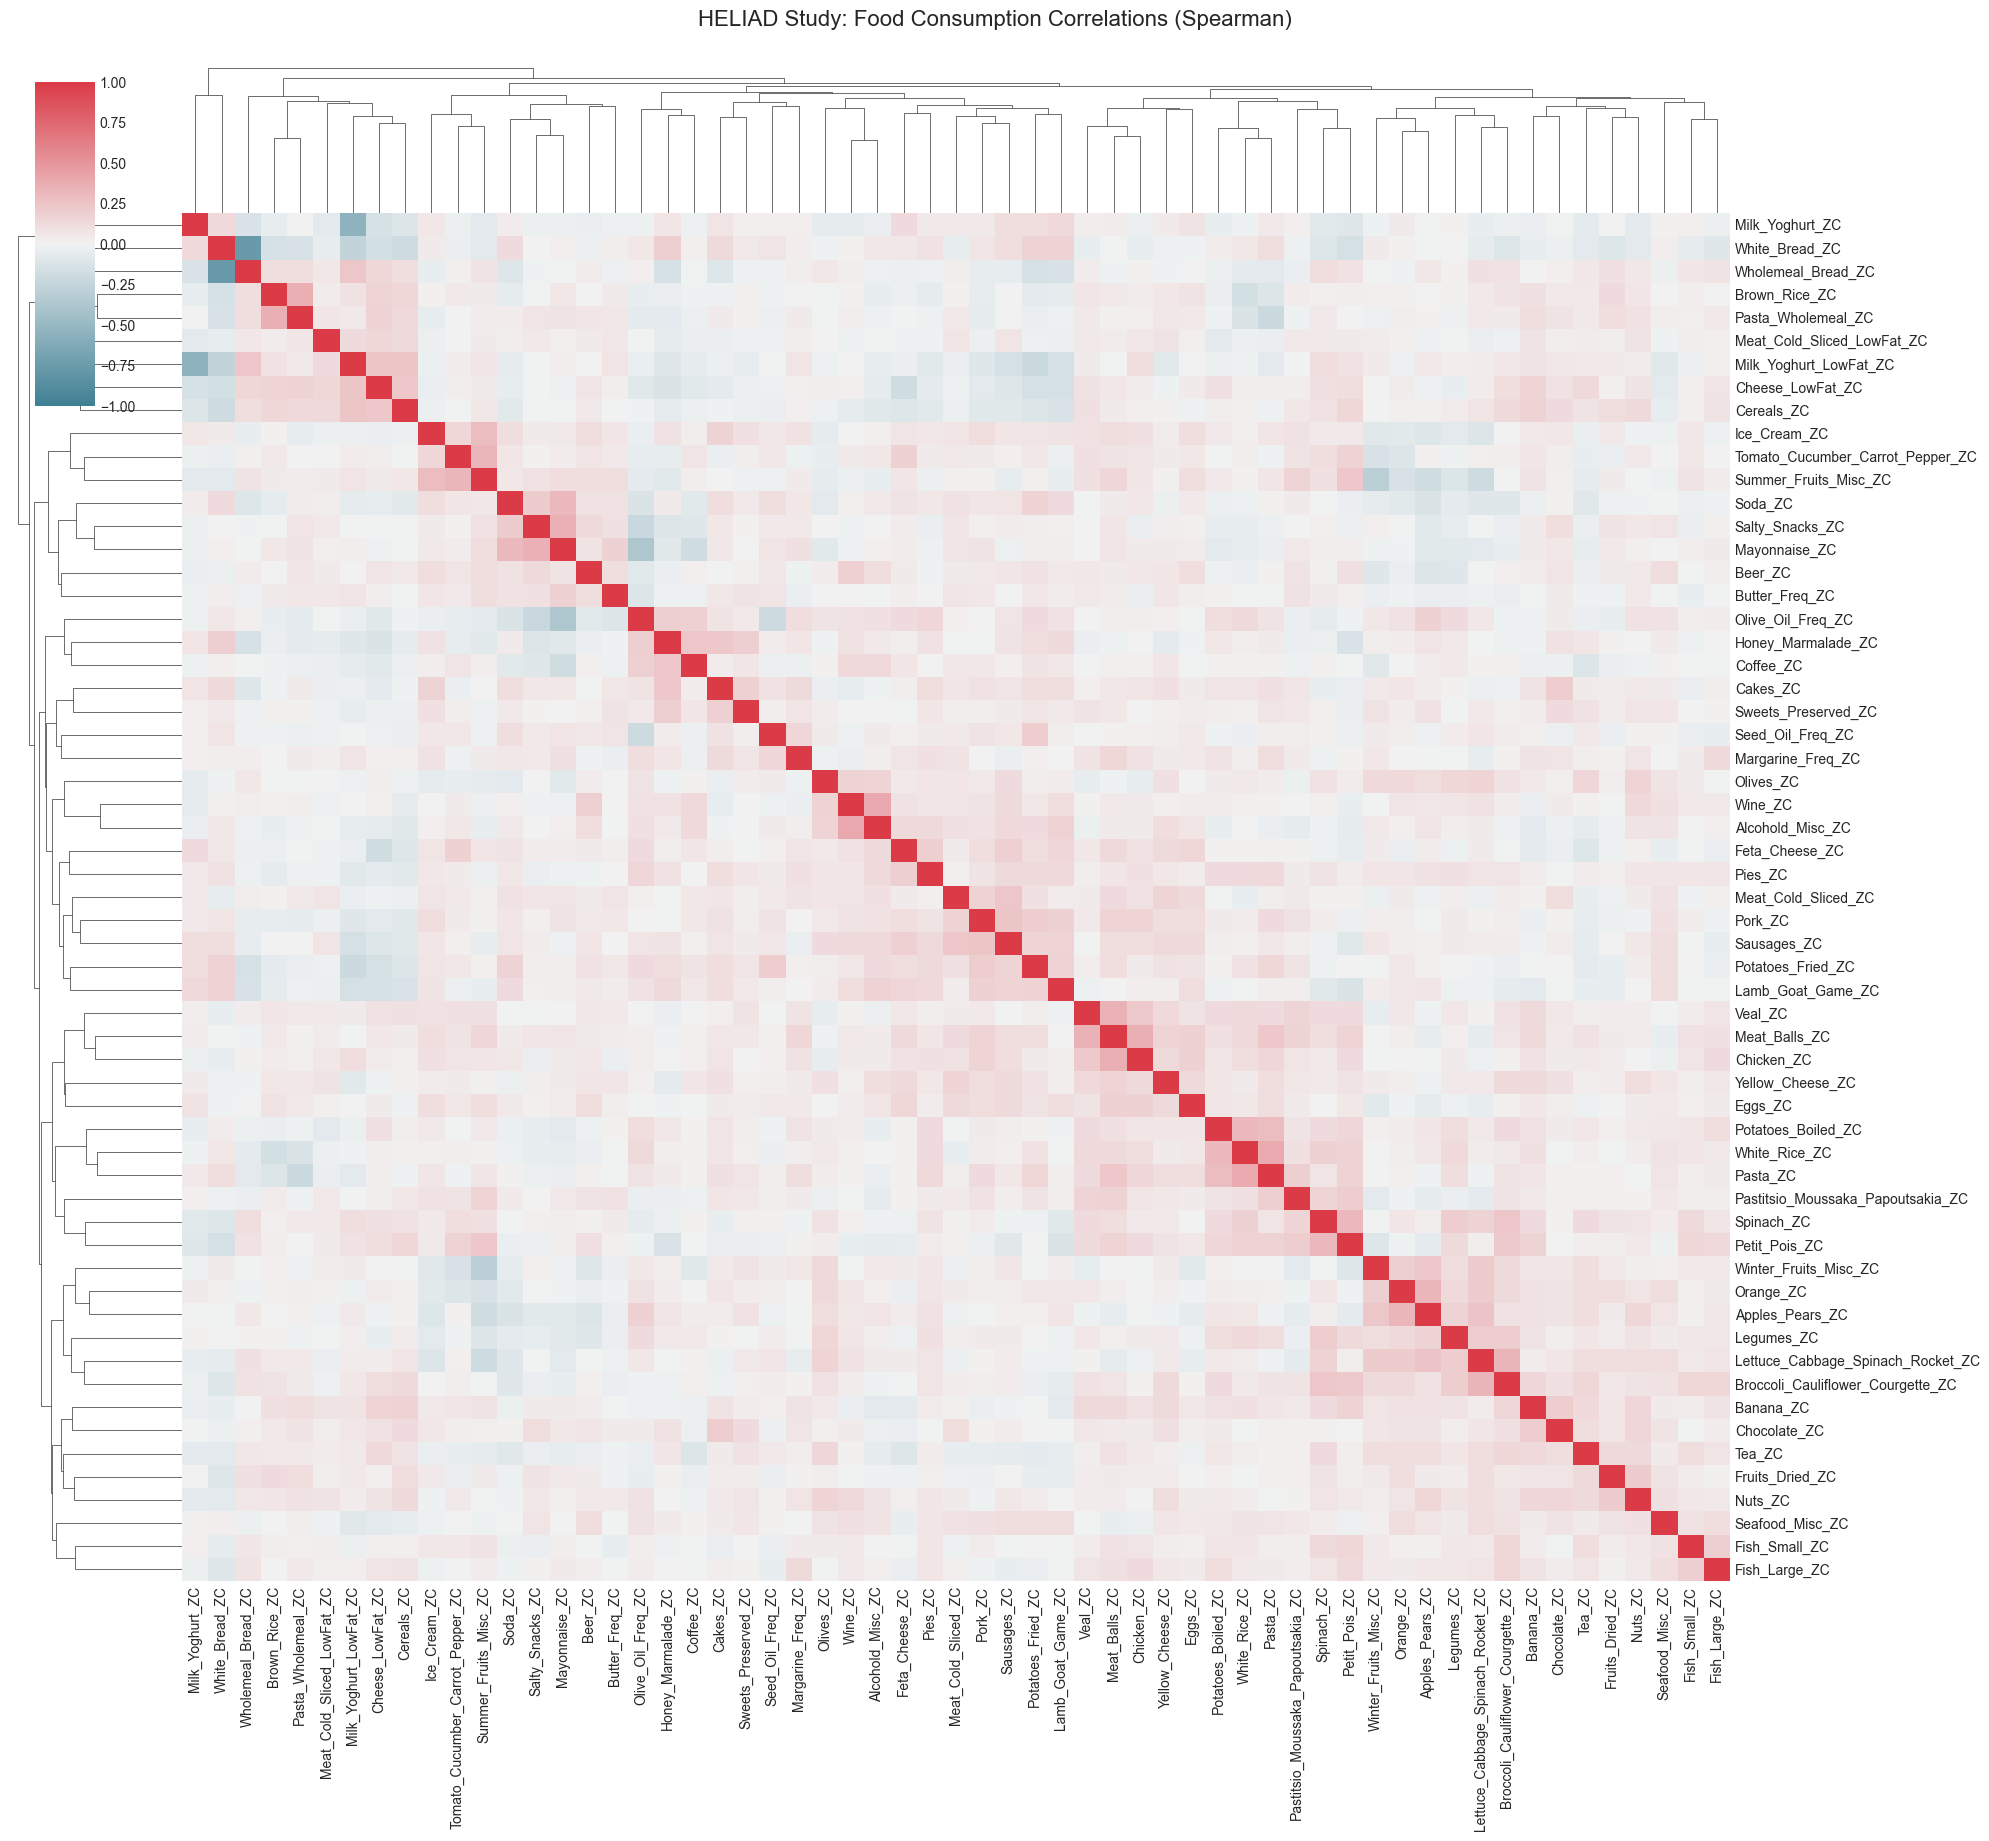

In [11]:
figsize=(20, 18)
mask = np.triu(np.ones_like(corr_matrix_pearson, dtype=bool))

plt.figure(figsize=figsize)

cmap = sns.diverging_palette(220, 10, as_cmap=True, center="light")

sns.clustermap(corr_matrix_pearson, 
                cmap=cmap, 
                center=0,
                vmin=-1, vmax=1,
                dendrogram_ratio=0.1,
                cbar_pos=(0.02, 0.8, 0.03, 0.18),
                figsize=figsize)

plt.suptitle("HELIAD Study: Food Consumption Correlations (Spearman)", y=1.02, fontsize=16)
plt.show()

Network created with 59 nodes and 44 edges
Average clustering coefficient: 0.254
Detected 26 natural communities in the food network
  Community 1: ['Pasta_ZC', 'White_Rice_ZC', 'Chicken_ZC', 'Brown_Rice_ZC', 'Pasta_Wholemeal_ZC', 'Meat_Balls_ZC', 'Veal_ZC', 'Potatoes_Boiled_ZC']
  Community 2: ['Milk_Yoghurt_ZC', 'White_Bread_ZC', 'Wholemeal_Bread_ZC', 'Milk_Yoghurt_LowFat_ZC', 'Potatoes_Fried_ZC', 'Cheese_LowFat_ZC', 'Cereals_ZC']
  Community 3: ['Ice_Cream_ZC', 'Broccoli_Cauliflower_Courgette_ZC', 'Spinach_ZC', 'Pastitsio_Moussaka_Papoutsakia_ZC', 'Summer_Fruits_Misc_ZC', 'Tomato_Cucumber_Carrot_Pepper_ZC', 'Petit_Pois_ZC']
  Community 4: ['Lettuce_Cabbage_Spinach_Rocket_ZC', 'Apples_Pears_ZC', 'Legumes_ZC', 'Winter_Fruits_Misc_ZC', 'Orange_ZC']
  Community 5: ['Mayonnaise_ZC', 'Seed_Oil_Freq_ZC', 'Salty_Snacks_ZC', 'Soda_ZC', 'Olive_Oil_Freq_ZC']


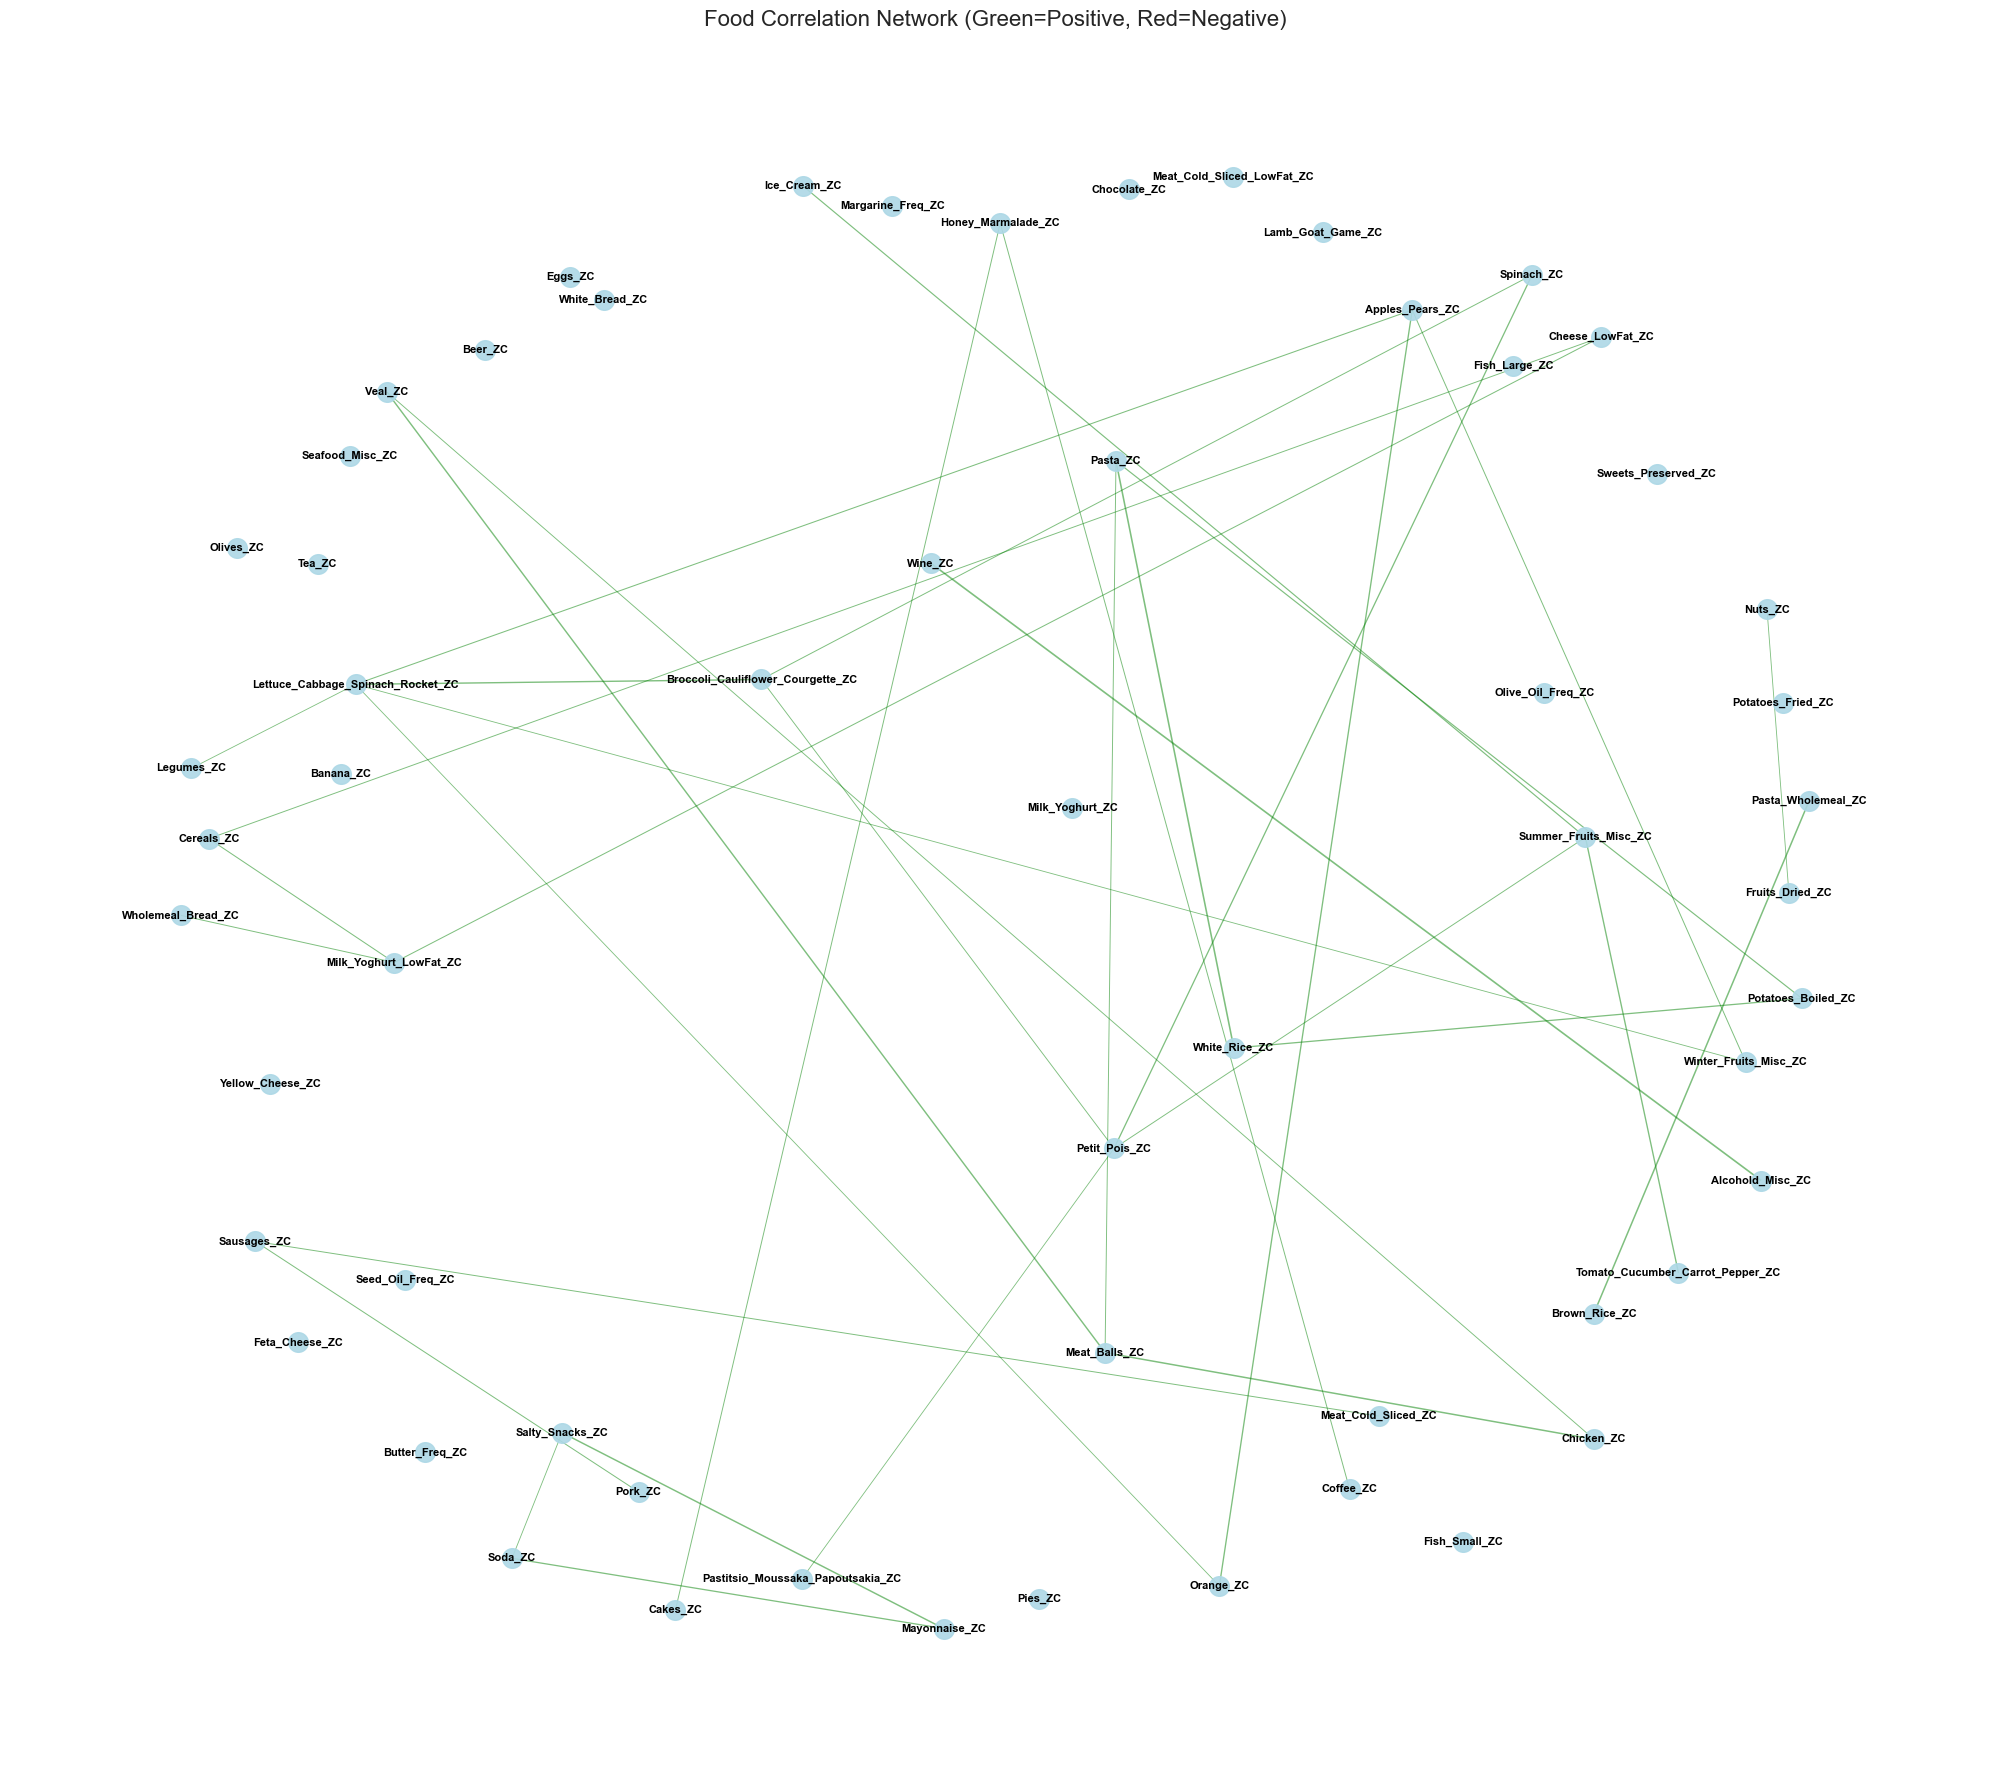

In [12]:
import networkx as nx
G = nx.Graph()

threshold = 0.2

for food in corr_matrix_pearson.columns:
    G.add_node(food)

for i, food1 in enumerate(corr_matrix_pearson.columns):
    for food2 in corr_matrix_pearson.columns[i+1:]:
        corr = corr_matrix_pearson.loc[food1, food2]
        if abs(corr) > threshold:
            G.add_edge(food1, food2, weight=abs(corr), sign=np.sign(corr))

print(f"Network created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

if G.number_of_edges() > 0:
    print(f"Average clustering coefficient: {nx.average_clustering(G):.3f}")
    
    from networkx.algorithms.community import greedy_modularity_communities
    communities = list(greedy_modularity_communities(G))
    print(f"Detected {len(communities)} natural communities in the food network")
    
    for i, community in enumerate(communities[:5]):  # Show first 5 communities
        print(f"  Community {i+1}: {list(community)[:10]}")  # Show first 10 foods

plt.figure(figsize=figsize)
    
pos = nx.spring_layout(G, k=1, iterations=50)

pos_edges = [(u, v) for (u, v, d) in G.edges(data=True) if d['sign'] > 0]

nx.draw_networkx_nodes(G, pos, node_size=200, 
                        node_color='lightblue', 
                        alpha=0.9)

nx.draw_networkx_edges(G, pos, edgelist=pos_edges, 
                        width=[G[u][v]['weight']*3 for u, v in pos_edges],
                        edge_color='green', alpha=0.5, style='solid')

nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.title("Food Correlation Network (Green=Positive, Red=Negative)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
heliad_foods_raw_values = [z for z in heliad_foods.columns if not p.match(z)]

In [14]:
heliad_raw = heliad_foods[heliad_foods_raw_values]

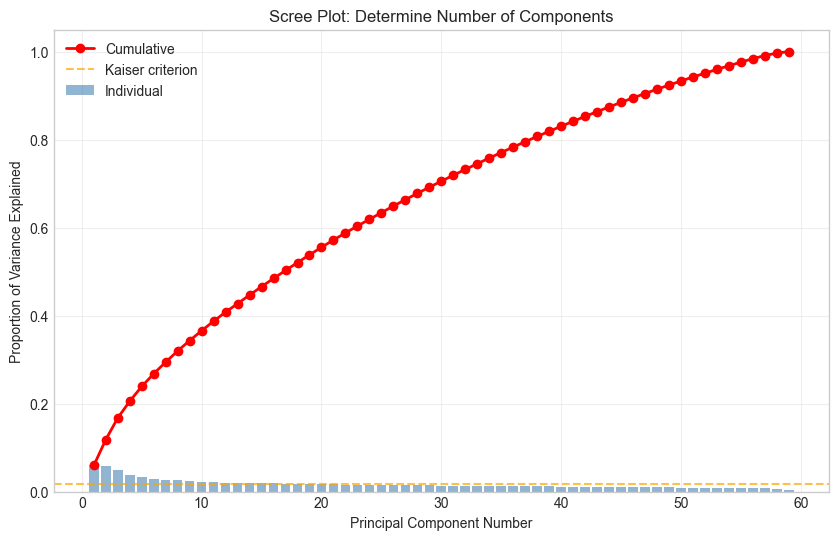

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Prepare data (assuming 'food_data' is your DataFrame)
scaler = StandardScaler()
food_data_z = scaler.fit_transform(heliad_raw)

# 2. Perform PCA
pca = PCA()
pca_components = pca.fit_transform(food_data_z)

# 3. Scree plot to determine number of components
plt.figure(figsize=(10, 6))
x = range(1, len(pca.explained_variance_ratio_) + 1)

# Bar plot (individual variance)
plt.bar(x, pca.explained_variance_ratio_, alpha=0.6, color='steelblue', label='Individual')

# Line plot (cumulative variance)
cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x, cumulative, 'ro-', linewidth=2, label='Cumulative')

# Kaiser criterion line (eigenvalue > 1)
plt.axhline(y=1/len(x), color='orange', linestyle='--', alpha=0.7, label='Kaiser criterion')

plt.xlabel('Principal Component Number')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot: Determine Number of Components')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


First 5 components explain: 23.9%
Components needed for 70% variance: 30


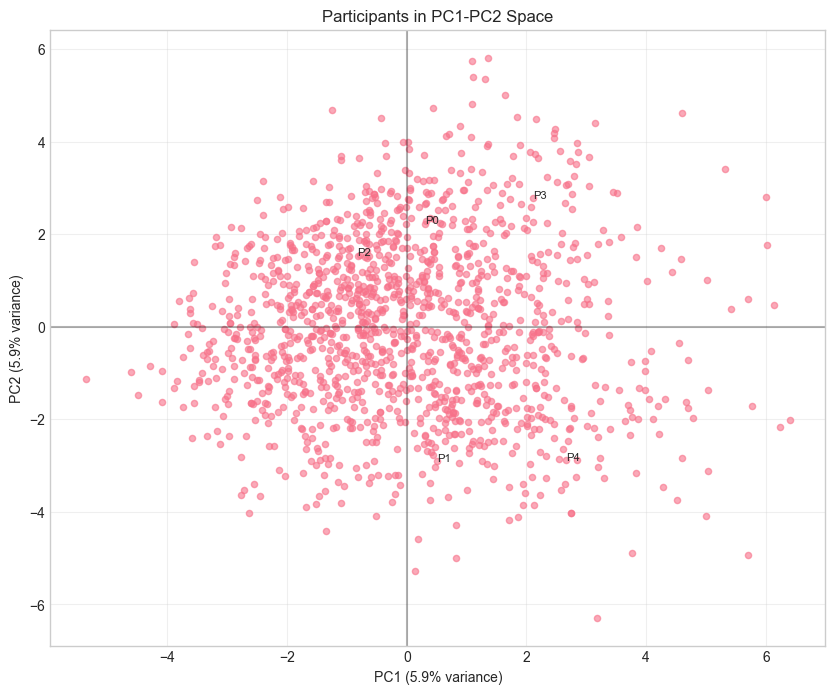

In [ ]:

print(f"First 5 components explain: {sum(pca.explained_variance_ratio_[:5]):.1%}")
print(f"Components needed for 70% variance: {np.where(cumulative > 0.7)[0][0] + 1}")

n_components = 5  # Choose based on scree plot elbow
pca_final = PCA(n_components=n_components)
components = pca_final.fit_transform(food_data_z)

components_df = pd.DataFrame(
    components,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=food_data.index
)

plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], alpha=0.6, s=20)

for i in range(min(5, len(components))):
    plt.annotate(f'P{i}', (components[i, 0], components[i, 1]), fontsize=8)

plt.xlabel(f'PC1 ({pca_final.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_final.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Participants in PC1-PC2 Space')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()


In [17]:
import pandas as pd 
loadings = pd.DataFrame(
    pca_final.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=heliad_raw.columns
)

print("\nTop foods for each component:")
for pc in loadings.columns:
    top_foods = loadings[pc].abs().sort_values(ascending=False).head(7)
    print(f"\n{pc}:")
    for food, loading in top_foods.items():
        sign = "+" if loadings.loc[food, pc] > 0 else "-"
        print(f"  {sign} {food}: {abs(loading):.3f}")


Top foods for each component:

PC1:
  + Petit_Pois: 0.256
  + Spinach: 0.246
  + Broccoli_Cauliflower_Courgette: 0.245
  + Banana: 0.225
  + Meat_Balls: 0.219
  + Veal: 0.206
  - White_Bread: 0.194

PC2:
  + Potatoes_Fried: 0.270
  + White_Bread: 0.263
  - Milk_Yoghurt_LowFat: 0.239
  + Lamb_Goat_Game: 0.233
  + Sausages: 0.233
  - Wholemeal_Bread: 0.224
  + Pork: 0.219

PC3:
  + Summer_Fruits_Misc: 0.316
  - Apples_Pears: 0.307
  - Lettuce_Cabbage_Spinach_Rocket: 0.270
  + Mayonnaise: 0.258
  - Winter_Fruits_Misc: 0.249
  - Olive_Oil_Freq: 0.242
  - Orange: 0.231

PC4:
  + White_Rice: 0.301
  + Pasta: 0.286
  - Pasta_Wholemeal: 0.258
  - Salty_Snacks: 0.253
  - Mayonnaise: 0.249
  + Potatoes_Boiled: 0.226
  + Petit_Pois: 0.218

PC5:
  + Alcohold_Misc: 0.304
  + Wine: 0.303
  + Wholemeal_Bread: 0.269
  + Coffee: 0.261
  - White_Bread: 0.249
  - Cakes: 0.239
  - Mayonnaise: 0.207


In [68]:
len(heliad_raw.columns.to_list())

59